# Aula 6 - DBSCAN

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) DBSCAN
- 2) Aplicação - clusterização de estações

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

____
____
____

## Bora praticar?

A partir do código disponibilizado abaixo, cujo objetivo é gerar uma amostra de 1.000 observações com duas features, treine os modelos de K-Means e DBSCAN aprendidos até a aula de hoje. Faça um gráfico para demonstrar os agrupamentos realizados em ambos os casos.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

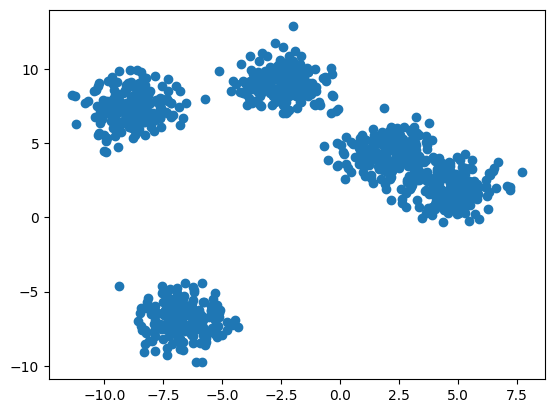

In [2]:
# Geracao dos dados
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=42)
df = pd.DataFrame(X, columns = ['x1', 'x2'])
plt.scatter(X[:,0], X[:,1])

plt.show()

In [3]:
df

,x1,x2
0,5.020077,2.583755
1,3.232367,1.195353
2,-6.107928,-9.728652
3,5.199669,3.053950
4,1.380819,4.593374
...,...,...
995,-4.633093,8.488531
996,3.291693,2.716434
997,-9.447840,7.136552
998,4.604890,3.743970


**DBSCAN**

In [4]:
from sklearn.cluster import DBSCAN

In [5]:
X = df[['x1', 'x2']]

In [6]:
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN()

In [7]:
dbscan.labels_

array([ 0, -1, -1,  0,  0,  1,  2,  0,  0,  0,  0,  4,  2,  1,  2,  1, -1,
        2,  3,  0, -1,  3,  2,  1,  3,  0,  3,  2,  0,  2,  0, -1,  0,  2,
        3,  1,  0,  0,  0,  3,  0,  2,  2,  1,  2,  1,  0,  0,  3,  1,  0,
        2,  1,  3,  3, -1,  3,  1,  1,  3,  0,  2,  1,  0,  1,  0,  2,  2,
        0,  0,  2,  1,  0,  1,  2,  3,  2,  0,  0,  2,  3,  0,  1,  1,  2,
        0,  3,  0,  3,  2,  0,  2,  0,  0,  0,  1,  3,  3,  1,  2,  1,  0,
        0,  1,  3,  0,  3,  1,  0,  3,  3,  0,  1,  1,  2,  3,  2,  1,  3,
       -1,  1, -1,  1,  1,  1,  1,  2,  1,  3,  0,  0,  2,  0,  0,  1,  0,
        0,  0,  3,  2,  1,  3,  0,  3,  0,  0,  1,  0,  0, -1, -1,  1,  0,
        0,  3,  0,  0,  3,  2,  0,  2,  0,  2, -1,  2,  0,  0,  2,  3,  0,
        1,  3,  3, -1,  0,  1,  2,  1,  0,  0,  0,  3,  0,  2,  0,  0,  0,
        1,  2,  3, -1, -1,  0,  0,  0,  3,  0,  1,  3,  0,  1,  2, -1,  1,
        2,  0,  0, -1,  0,  0,  3,  2,  2,  0,  0,  1,  1,  1, -1,  0,  1,
        1,  3,  1,  3,  0

In [8]:
X['clusters'] = dbscan.labels_

In [9]:
X['clusters'].nunique()

6

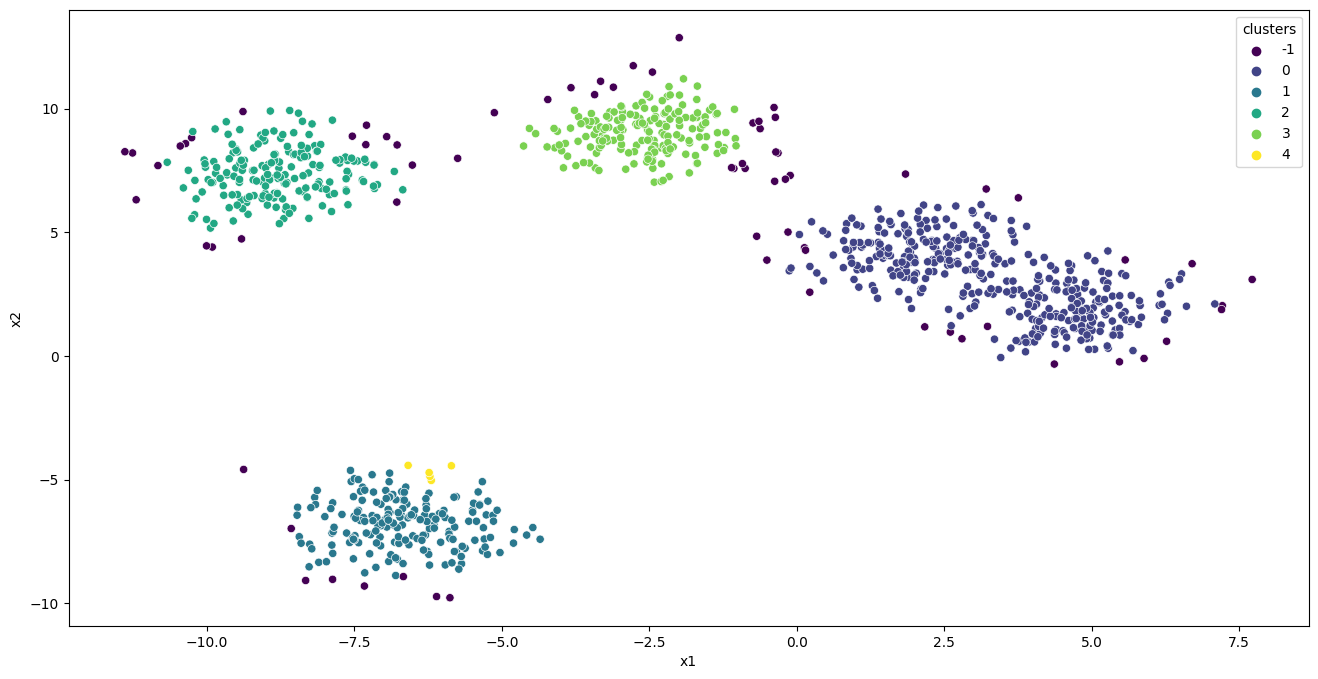

In [10]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=X, x='x1', y='x2', hue='clusters', palette='viridis')
plt.show()

**K-Means**

In [11]:
from sklearn.cluster import KMeans

In [12]:
X_kmeans = df.copy()

In [13]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_kmeans)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [14]:
kmeans.labels_

array([0, 0, 1, 0, 4, 1, 2, 4, 0, 4, 4, 1, 2, 1, 2, 1, 3, 2, 3, 4, 0, 3,
       2, 1, 3, 4, 3, 2, 4, 2, 0, 2, 4, 2, 3, 1, 4, 4, 4, 3, 4, 2, 2, 1,
       2, 1, 4, 0, 3, 1, 0, 2, 1, 3, 3, 3, 3, 1, 1, 3, 0, 2, 1, 4, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 2, 3, 2, 0, 4, 2, 3, 0, 1, 1, 2, 0, 3, 4,
       3, 2, 0, 2, 0, 4, 4, 1, 3, 3, 1, 2, 1, 4, 0, 1, 3, 0, 3, 1, 4, 3,
       3, 0, 1, 1, 2, 3, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1, 3, 0, 0, 2,
       0, 4, 1, 4, 0, 4, 3, 2, 1, 3, 0, 3, 0, 0, 1, 0, 0, 4, 2, 1, 0, 0,
       3, 0, 0, 3, 2, 0, 2, 4, 2, 3, 2, 4, 4, 2, 3, 0, 1, 3, 3, 1, 4, 1,
       2, 1, 0, 4, 0, 3, 0, 2, 4, 4, 0, 1, 2, 3, 2, 3, 0, 4, 0, 3, 4, 1,
       3, 0, 1, 2, 1, 1, 2, 4, 4, 3, 4, 0, 3, 2, 2, 4, 0, 1, 1, 1, 2, 4,
       1, 1, 3, 1, 3, 4, 1, 4, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 2, 0, 4, 2,
       1, 4, 1, 1, 1, 1, 2, 4, 1, 1, 4, 0, 4, 3, 2, 0, 0, 3, 0, 4, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 0, 2, 4, 3, 4, 1, 3, 2, 4, 4, 1, 0, 4, 1, 2,
       0, 0, 0, 3, 4, 3, 2, 4, 0, 2, 4, 4, 3, 0, 2,

In [15]:
X_kmeans['clusters'] = kmeans.labels_

In [16]:
X_kmeans

,x1,x2,clusters
0,5.020077,2.583755,0
1,3.232367,1.195353,0
2,-6.107928,-9.728652,1
3,5.199669,3.053950,0
4,1.380819,4.593374,4
...,...,...,...
995,-4.633093,8.488531,3
996,3.291693,2.716434,0
997,-9.447840,7.136552,2
998,4.604890,3.743970,0


In [17]:
X_kmeans['clusters'].nunique()

5

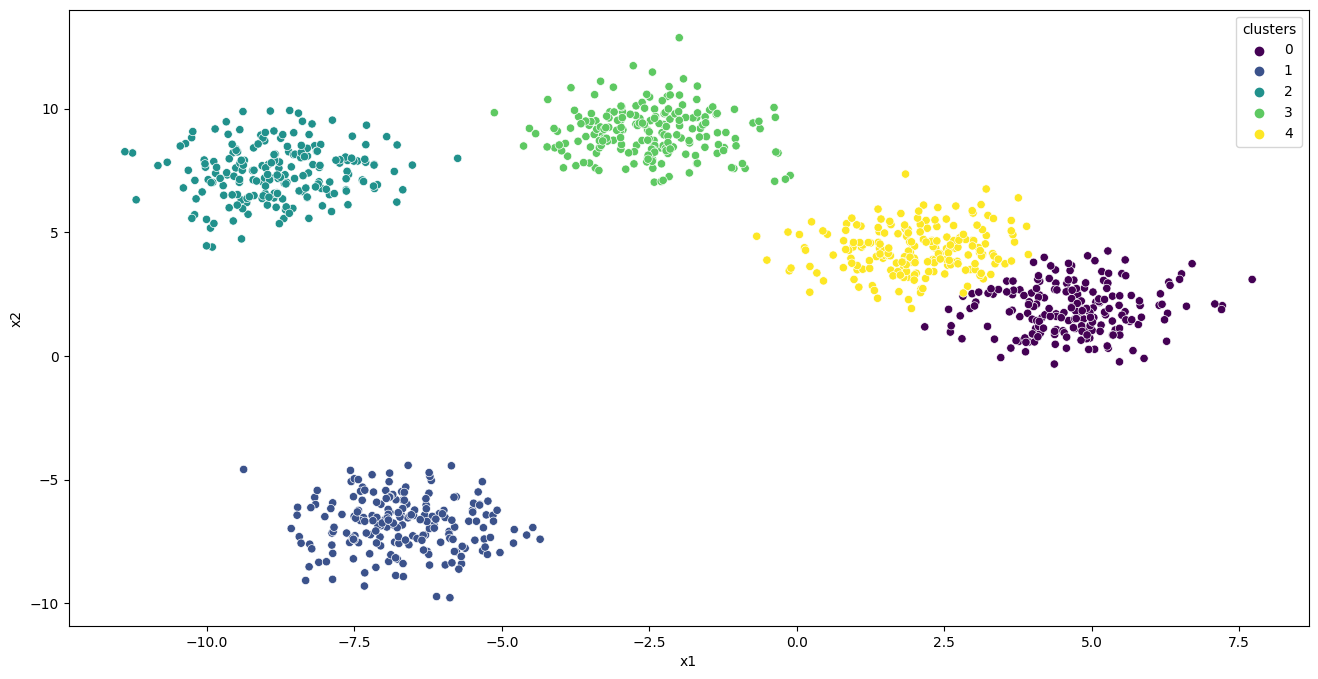

In [18]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=X_kmeans, x='x1', y='x2', hue='clusters', palette='viridis')
plt.show()

**Comparação entre os modelos**

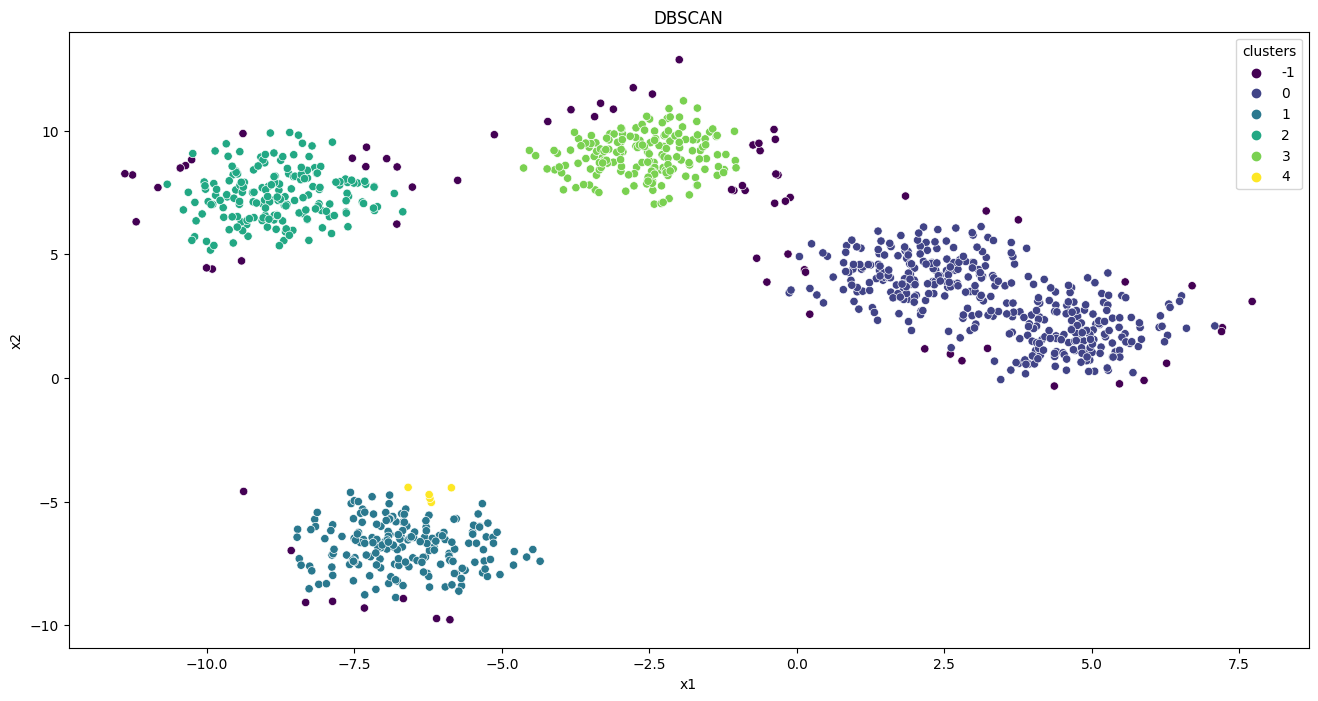

In [19]:
plt.figure(figsize=(16, 8))
plt.title('DBSCAN')
sns.scatterplot(data=X, x='x1', y='x2', hue='clusters', palette='viridis')
plt.show()

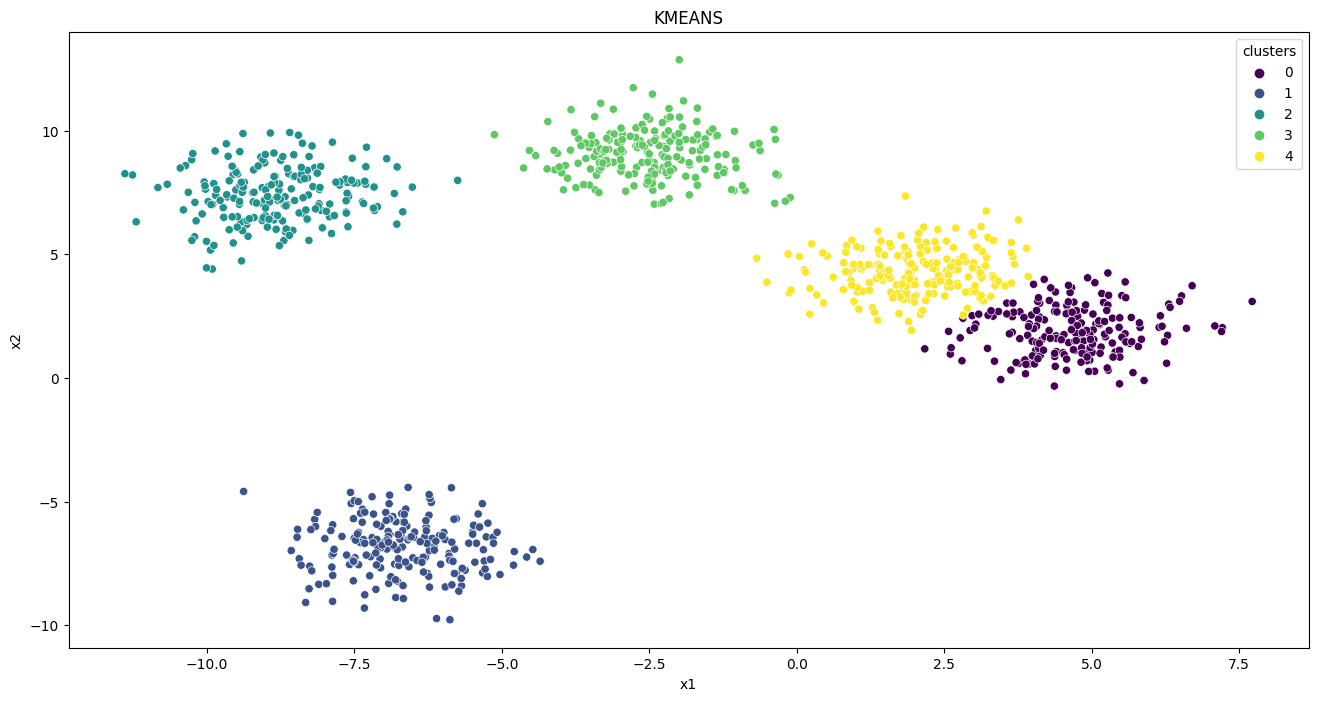

In [20]:
plt.figure(figsize=(16, 8))
plt.title('KMEANS')
sns.scatterplot(data=X_kmeans, x='x1', y='x2', hue='clusters', palette='viridis')
plt.show()